# Plotting of Simulated data vs Grimal data

In [30]:
# Obtain the experimental data from .mat file
import scipy.io as sio
import numpy as np
C_tibia_PG = sio.loadmat('Files_mat/GrimalDataV1p3.mat')
# Define the constants
# The stiffness constants have units in [GPa]
C22_pg = C_tibia_PG['C11'].squeeze()
C12_pg = C_tibia_PG['C12'].squeeze()
C13_pg = C_tibia_PG['C13'].squeeze()
C22_pg = C_tibia_PG['C22'].squeeze()
C33_pg = C_tibia_PG['C33'].squeeze()
C44_pg = C_tibia_PG['C44'].squeeze()
C66_pg = C_tibia_PG['C66'].squeeze()
# Define porosity function to plot Tibia PG predictions
porosity_pg = np.arange(0.01, 0.49, step=0.01)
# Obtain density function
density_pg = 2.03*(1-porosity_pg) + porosity_pg
C_tibia_PG.keys()

dict_keys(['__header__', '__version__', '__globals__', 'C11', 'C22', 'C33', 'C12', 'C13', 'C44', 'C66'])

In [31]:
# Import Q values from Grimal data
Q_grimal_data = sio.loadmat('Files_mat/Q_aniso_Grimal.mat')
# Extract density, Q^{-1} values and errors
d_grimal = Q_grimal_data['Q_aniso'][0, 0][0]
Q_inv_grimal = Q_grimal_data['Q_aniso'][0, 0][1]
Q_inv_error_grimal = Q_grimal_data['Q_aniso'][0, 0][2]
Q_grimal_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Q_aniso'])

Text(0, 0.5, 'Experimental $Q_{ij}^{-1}$ ')

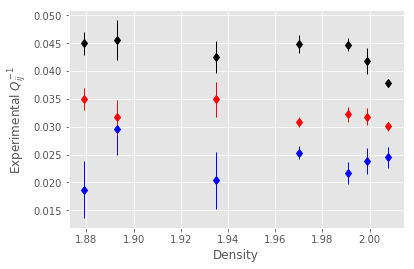

In [32]:
import pickle, io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.errorbar(d_grimal.squeeze(), Q_inv_grimal[0, :], \
             yerr=Q_inv_error_grimal[0, :], fmt='db', linewidth=1)
plt.errorbar(d_grimal.squeeze(), Q_inv_grimal[1, :], \
             yerr=Q_inv_error_grimal[1, :], fmt='dk', linewidth=1)
plt.errorbar(d_grimal.squeeze(), Q_inv_grimal[2, :], \
             yerr=Q_inv_error_grimal[2, :], fmt='dr', linewidth=1)
plt.xlabel('Density')
plt.ylabel('Experimental $Q_{ij}^{-1}$ ')

In [33]:
# Import Tibia Data from Grimal file
tibia_data = sio.loadmat('Files_mat/Data_Tibia_Grimal.mat')
# Define variables associated to each measurement
Q44_tibia = tibia_data['DataTibia'][0, 0][0].squeeze()
Q44_sens_tibia = tibia_data['DataTibia'][0, 0][1].squeeze()
QE3_tibia = tibia_data['DataTibia'][0, 0][2].squeeze()
QE1_tibia = tibia_data['DataTibia'][0, 0][3].squeeze()
Qshear_tibia = tibia_data['DataTibia'][0, 0][4].squeeze()
density_tibia = tibia_data['DataTibia'][0, 0][5].squeeze()
C11_tibia = tibia_data['DataTibia'][0, 0][6].squeeze()
C33_tibia = tibia_data['DataTibia'][0, 0][7].squeeze()
C13_tibia = tibia_data['DataTibia'][0, 0][8].squeeze()
C44_tibia = tibia_data['DataTibia'][0, 0][9].squeeze()
C66_tibia = tibia_data['DataTibia'][0, 0][10].squeeze()
#tibia_data['DataTibia']

## Plot relations between $C_{ijkl}$ and $Q^{-1}_{ijkl}$

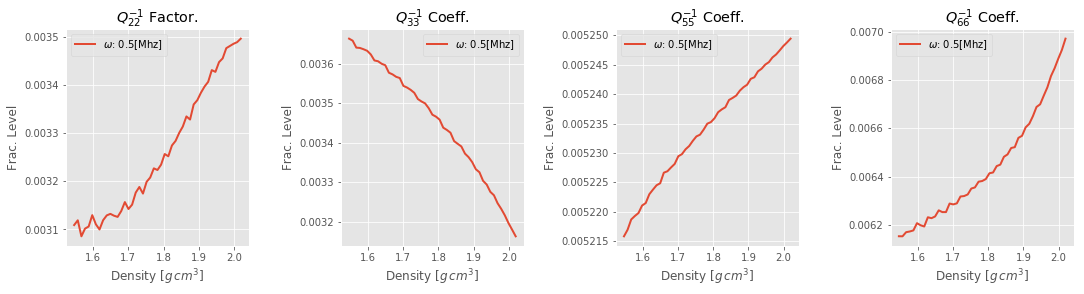

In [89]:
import pickle, io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# First, Obtain the structure
structure = 'Circular'
#structure = 'Rectangular'
# Obtain porosity array
porosities_sim = np.arange(0.01, 0.48, step=0.01)
# Density function, derived from sb data
density_sim = 2.03*(1-porosities_sim) + porosities_sim
# Radial frequency associated to the simulation --> omega [Mhz]
# Now, create the plot figure
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
fig.subplots_adjust(left=0.2, wspace=0.5)
# Define legend label
legend_name = []
# Obtain the mesh partition, fixed!
part = 50
for omega in [0.5]: #[0.1, 0.2, 0.5]
    #filename = 'DataPICKLE/Visc_'+str(structure)+'2DPart'+\
    #            str(part)+'m14-3_f4-3_Freq'+str(omega)+'_Tibia.pickle'
    filename = 'DataPICKLE/Visc_'+str(structure)+'2DPart'+\
                str(part)+'m14-3_f6-3_Freq'+str(omega)+'_Tibia.pickle'
    legend_name.append('$\omega$: '+str(omega)+'[Mhz]')
    with open(filename, 'rb') as handle:
        data_saved = pickle.load(handle)
    # Now, plot the case of Inverse Q_22
    IQ_22 = np.array(data_saved['D22'])/\
            np.array(data_saved['C22'])
    ax[0].plot(density_sim, omega*IQ_22, linewidth=2)
    # plot the case of Inverse Q_33
    IQ_33 = np.array(data_saved['D33'])/\
            np.array(data_saved['C33'])
    ax[1].plot(density_sim, omega*IQ_33, linewidth=2)
    # Now, for the case inverse Q_44 = Q_55
    IQ_55 = np.array(data_saved['D55'])/\
            np.array(data_saved['C55'])
    ax[2].plot(density_sim, omega*IQ_55, linewidth=2)
    # Finally, case of inverse Q_66
    IQ_66 = np.array(data_saved['D66'])/\
            np.array(data_saved['C66'])
    ax[3].plot(density_sim, omega*IQ_66, linewidth=2)
    
# Add more formating to the plot.
for n in range(0,4):
    if n == 0:
        ax[n].set_title('$Q^{-1}_{22}$ Factor.')
    elif n == 1:
        ax[n].set_title('$Q^{-1}_{33}$ Coeff.')
    elif n == 2:
        ax[n].set_title('$Q^{-1}_{55}$ Coeff.')
    else:
        ax[n].set_title('$Q^{-1}_{66}$ Coeff.')
    
    # set ylabel at each case
    ax[n].set_ylabel('Frac. Level')
    # Mark the other options for the figure
    ax[n].set_xlabel('Density $[g\, cm^{3}]$')
    #ax[n].set_xlim([0.0, 0.3])
    # Add legend
    ax[n].legend(legend_name, loc='best')
    #ax[n].grid()
# save it!
#filename = 'Plots/CellProb_Qfactor'+str(structure)+\
#           'E-3.png'
#plt.savefig(filename, dpi=150, bbox_inches='tight')
# show plot
plt.show()

In [90]:
# Exporting to .mat files
filename_mat = 'DataMAT/Visc_'+str(structure)+'2DPart'+\
                str(part)+'m14-3_f6-3_Freq'+str(omega)+'_Tibia'
data_to_save = {'density_sim': density_sim,
                'frequency': omega,
                'C22': data_saved['C22'],
                'C33': data_saved['C33'],
                'C55': data_saved['C55'],
                'C66': data_saved['C66'],
                'C12': data_saved['C12'],
                'C23': data_saved['C23'],
                'D22': data_saved['D22'],
                'D33': data_saved['D33'],
                'D55': data_saved['D55'],
                'D66': data_saved['D66'],
                'D12': data_saved['D12'],
                'D23': data_saved['D23']}
sio.savemat(filename_mat, data_to_save, appendmat=True)

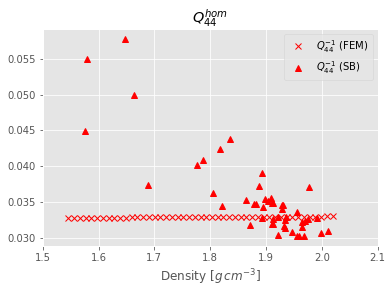

In [87]:
# Plot the Q_{44} quality factor from SB data
plt.title("$Q_{44}^{hom}$")
aux_55 = np.array(data_saved['D55'])/np.array(data_saved['C55'])
plt.plot(density_sim, 2*np.pi*0.5*aux_55, 'rx', linewidth=2)

Q44_indx = Q44_sens_tibia >= 0.8
plt.plot(density_tibia[Q44_indx], 1/Q44_tibia[Q44_indx], \
         'r^', linewidth=2)
plt.legend(["$Q_{44}^{-1}$ (FEM)", "$Q_{44}^{-1}$ (SB)"])
plt.xlabel("Density $[g \, cm^{-3}]$")
plt.xlim([1.5, 2.1])
#plt.ylabel('$Q_{ij}^{-1}$')
#plt.grid()
filename = 'Plots/Q44_'+str(structure)+\
           'm14-3_f6-3_Freq01_Rel_Tibia'
for _ in ['.pdf', '.png']:
    plt.savefig(filename+_, dpi=200, bbox_inches='tight')
    
plt.show()

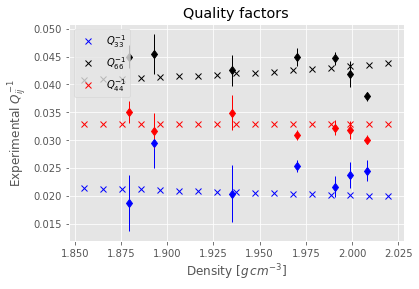

In [86]:
# Consider only relevant simulation for density > 1.85
relevant_indx = density_sim > 1.85
plt.title("Quality factors")

aux_33 = 2*np.pi*np.array(data_saved['D33'])/np.array(data_saved['C33'])
plt.plot(density_sim[relevant_indx], 0.5*aux_33[relevant_indx], 
         'bx', linewidth=2)
plt.errorbar(d_grimal.squeeze(), Q_inv_grimal[0, :], \
             yerr=Q_inv_error_grimal[0, :], fmt='db', linewidth=1)

aux_66 = 2*np.pi*np.array(data_saved['D66'])/np.array(data_saved['C66'])
plt.plot(density_sim[relevant_indx], 0.5*aux_66[relevant_indx],
         'kx', linewidth=2)
plt.errorbar(d_grimal.squeeze(), Q_inv_grimal[1, :], \
             yerr=Q_inv_error_grimal[1, :], fmt='dk', linewidth=1)


aux_55 = 2*np.pi*np.array(data_saved['D55'])/np.array(data_saved['C55'])
plt.plot(density_sim[relevant_indx], 0.5*aux_55[relevant_indx],
         'rx',linewidth=2)
plt.errorbar(d_grimal.squeeze(), Q_inv_grimal[2, :], \
             yerr=Q_inv_error_grimal[2, :], fmt='dr', linewidth=1)

plt.legend(["$Q_{33}^{-1}$","$Q_{66}^{-1}$","$Q_{44}^{-1}$"])
plt.xlabel("Density $[g \, cm^{-3}]$")
plt.ylabel('Experimental $Q_{ij}^{-1}$')
plt.show()
#plt.grid()

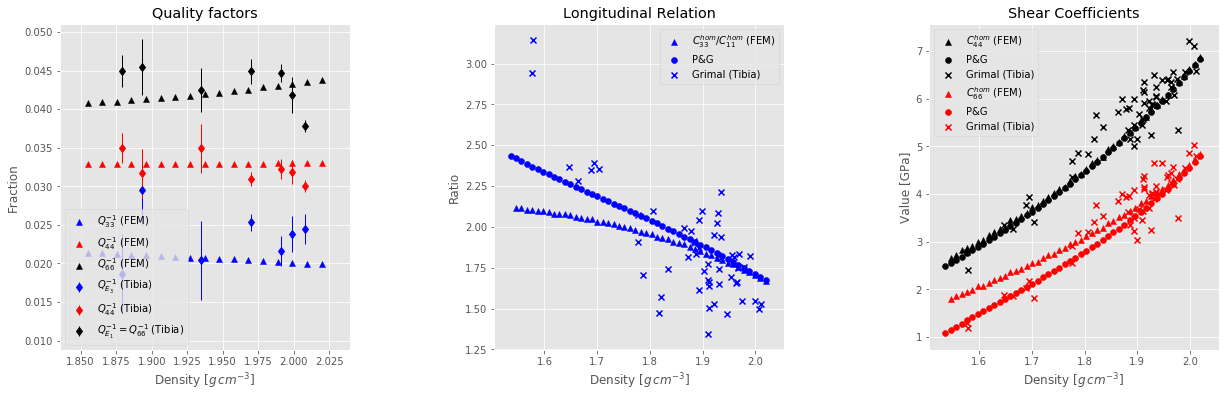

In [85]:
# Create the plot figure
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,4))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(23,6))
fig.subplots_adjust(left=0.2, wspace=0.5)
# Define legend label
legend_name = []
# Obtain the mesh partition, fixed!
part = 50
# Iterate over the files
# plot the case of Inverse Q_33
IQ_33 = 2*np.pi*0.5*np.array(data_saved['D33'])/np.array(data_saved['C33'])
ax[0].scatter(density_sim[relevant_indx], IQ_33[relevant_indx], color='b', marker='^')
ax[0].errorbar(d_grimal.squeeze(), Q_inv_grimal[0, :], \
               yerr=Q_inv_error_grimal[0, :], fmt='db', linewidth=1)

# Now, for the case inverse Q_44 = Q_55
IQ_55 = 2*np.pi*0.5*np.array(data_saved['D55'])/np.array(data_saved['C55'])
ax[0].scatter(density_sim[relevant_indx], IQ_55[relevant_indx], color='r', marker='^')

ax[0].errorbar(d_grimal.squeeze(), Q_inv_grimal[2, :], \
               yerr=Q_inv_error_grimal[2, :], fmt='dr', linewidth=1)

# Finally, case of inverse Q_66
IQ_66 = 2*np.pi*0.5*np.array(data_saved['D66'])/np.array(data_saved['C66'])
ax[0].scatter(density_sim[relevant_indx], IQ_66[relevant_indx], color='k', marker='^')

ax[0].errorbar(d_grimal.squeeze(), Q_inv_grimal[1, :], \
               yerr=Q_inv_error_grimal[1, :], fmt='dk', linewidth=1)

# Set limits of both boundaries
#ax[0].set_xlim([1.59, 1.92])
#ax[0].set_ylim([0.046, 0.0505])

# plot the elasctic coefficients also
ratio_sim = np.array(data_saved['C33'])/\
            np.array(data_saved['C22'])
ax[1].scatter(density_sim, ratio_sim, color='b', \
              marker='^')
ax[1].scatter(density_pg, C33_pg/C22_pg, color='b', marker='o')
ax[1].scatter(density_tibia, C33_tibia/C11_tibia, color='b', \
              marker='x')
#ax[1].set_xlim([1.59, 1.92])
#ax[1].set_ylim([1.1, 3])
#Ratio_5566 = np.array(data_saved['C55'])/\
#             np.array(data_saved['C66'])
#ax[1].plot(d, Ratio_5566, 'ro--', linewidth=2)

# Plot other coeffs for comparison with Bernard et al. 2015
ax[2].scatter(density_sim, np.array(data_saved['C55']), \
              color='k', marker='^')
ax[2].scatter(density_pg, C44_pg, color='k', marker='o')
ax[2].scatter(density_tibia, C44_tibia, \
              color='k', marker='x')

ax[2].scatter(density_sim, np.array(data_saved['C66']), \
              color='r', marker='^')
ax[2].scatter(density_pg, C66_pg, color='r', marker='o')
ax[2].scatter(density_tibia, C66_tibia, \
              color='r', marker='x')

#ax[2].set_xlim([1.59, 1.92])

# Add more formating to the plot.
# set ylabel at each case
ax[0].set_ylabel('Fraction')
ax[1].set_ylabel('Ratio')
ax[2].set_ylabel('Value [GPa]')
# Mark the other options for the figure
ax[0].set_xlabel('Density $[g\, cm^{-3}]$')
ax[1].set_xlabel('Density $[g\, cm^{-3}]$')
ax[2].set_xlabel('Density $[g\, cm^{-3}]$')
# Give titles to the plots
ax[0].set_title('Quality factors')
ax[1].set_title('Longitudinal Relation')
ax[2].set_title('Shear Coefficients')

# Add legend
ax[0].legend(["$Q_{33}^{-1}$ (FEM)", "$Q_{44}^{-1}$ (FEM)", "$Q_{66}^{-1}$ (FEM)", \
              "$Q_{E_{3}}^{-1}$ (Tibia)", "$Q_{44}^{-1}$ (Tibia)", "$Q_{E_{1}}^{-1}=Q_{66}^{-1}$ (Tibia)"], \
              loc='best')
ax[1].legend(["$C^{hom}_{33}/C^{hom}_{11}$ (FEM)", "P&G", "Grimal (Tibia)"], loc='best')
ax[2].legend(['$C^{hom}_{44}$ (FEM)', 'P&G', 'Grimal (Tibia)','$C^{hom}_{66}$ (FEM)', 'P&G', 'Grimal (Tibia)'], loc='best')

#ax[0].grid()
#ax[1].grid()
#ax[2].grid()
# save it!
filename = 'Plots/CellProb_Qfactor'+str(structure)+\
           'm14-3_f6-3_Freq05_Rel_Tibia'
for _ in ['.pdf', '.png']:
    plt.savefig(filename+_, dpi=200, bbox_inches='tight')
# show plot
plt.show()

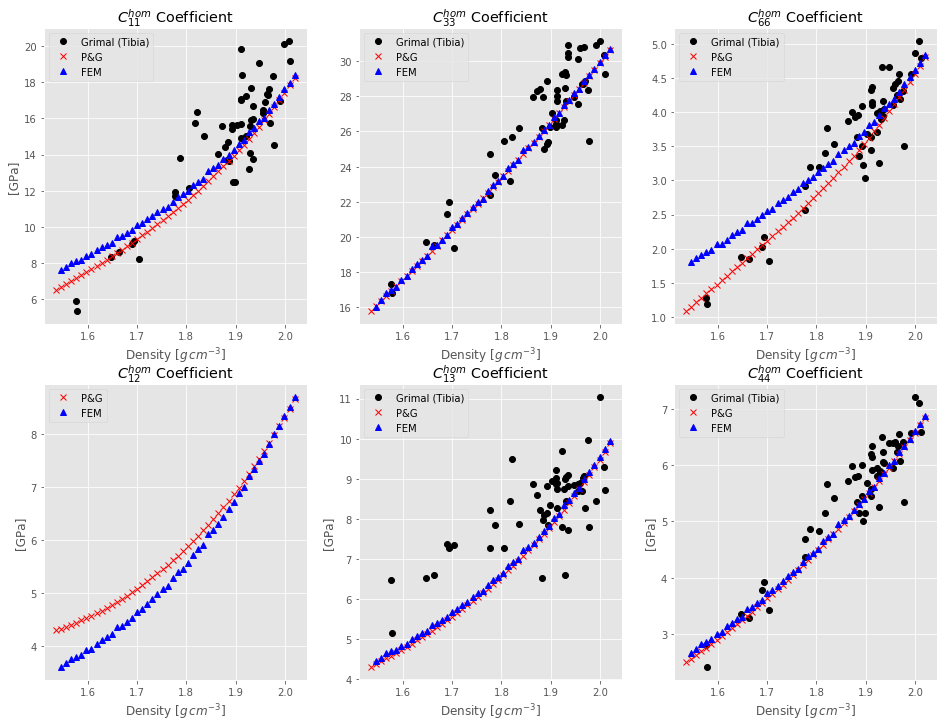

In [80]:
plt.figure(figsize=(16, 12))
plt.subplot(2,3,1)
plt.plot(density_tibia, C11_tibia, 'ko')
plt.plot(density_pg, C22_pg, 'rx')
plt.plot(density_sim, data_saved['C22'], 'b^')
plt.title('$C_{11}^{hom}$ Coefficient')
plt.xlabel('Density $[g\, cm^{-3}]$')
plt.ylabel('[GPa]')
plt.legend(['Grimal (Tibia)', 'P&G', 'FEM'])

plt.subplot(2,3,2)
plt.plot(density_tibia, C33_tibia, 'ko')
plt.plot(density_pg, C33_pg, 'rx')
plt.plot(density_sim, data_saved['C33'],'b^')
plt.title('$C_{33}^{hom}$ Coefficient')
plt.xlabel('Density $[g\, cm^{-3}]$')
plt.legend(['Grimal (Tibia)', 'P&G', 'FEM'])

plt.subplot(2,3,3)
plt.plot(density_tibia, C66_tibia, 'ko')
plt.plot(density_pg, C66_pg, 'rx')
plt.plot(density_sim, data_saved['C66'],'b^')
plt.title('$C_{66}^{hom}$ Coefficient')
plt.xlabel('Density $[g\, cm^{-3}]$')
plt.legend(['Grimal (Tibia)', 'P&G', 'FEM'])

#check THIS ONE!
plt.subplot(2,3,4)
plt.plot(density_pg, C12_pg, 'rx')
plt.plot(density_sim, data_saved['C12'],'b^')
plt.title('$C_{12}^{hom}$ Coefficient')
plt.xlabel('Density $[g\, cm^{-3}]$')
plt.ylabel('[GPa]')
plt.legend(['P&G', 'FEM'])

plt.subplot(2,3,5)
plt.plot(density_tibia, C13_tibia, 'ko')
plt.plot(density_pg, C13_pg, 'rx')
plt.plot(density_sim, data_saved['C23'],'b^')
plt.title('$C_{13}^{hom}$ Coefficient')
plt.xlabel('Density $[g\, cm^{-3}]$')
plt.ylabel('[GPa]')
plt.legend(['Grimal (Tibia)', 'P&G', 'FEM'])

plt.subplot(2,3,6)
plt.plot(density_tibia, C44_tibia, 'ko')
plt.plot(density_pg, C44_pg, 'rx')
plt.plot(density_sim, data_saved['C55'],'b^')
plt.title('$C_{44}^{hom}$ Coefficient')
plt.xlabel('Density $[g\, cm^{-3}]$')
plt.ylabel('[GPa]')
plt.legend(['Grimal (Tibia)', 'P&G', 'FEM'])

plt.savefig('Plots/Elastic_Coeffs_m14-3_f6-1_freq05.pdf', dpi=200, bbox_inches='tight')
plt.show()

### Easy Plotting function and comparison

In [ ]:
def QFactorPlot(data_saved, eps_factor):
    # Create the plot figure
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    fig.subplots_adjust(left=0.2, wspace=0.5)
    # Define legend label
    legend_name = []
    # Obtain the mesh partition, fixed!
    part = 50
    # Iterate over the files
    # plot the case of Inverse Q_33
    IQ_33 = np.array(data_saved['D33'])/\
            np.array(data_saved['C33'])
    ax[0].plot(d, IQ_33, 'bo--' ,linewidth=2)
    # Now, for the case inverse Q_44 = Q_55
    IQ_55 = np.array(data_saved['D55'])/\
            np.array(data_saved['C55'])
    ax[0].plot(d, IQ_55, 'ro--', linewidth=2)
    # Finally, case of inverse Q_66
    IQ_66 = np.array(data_saved['D66'])/\
            np.array(data_saved['C66'])
    ax[0].plot(d, IQ_66, 'ko--', linewidth=2)

    # plot the elasctic coefficients also
    EC_33 = np.array(data_saved['C33'])
    ax[1].plot(d, EC_33, 'bo--', linewidth=2)
    EC_55 = np.array(data_saved['C55'])
    ax[1].plot(d, EC_55, 'ro--', linewidth=2)
    EC_66 = np.array(data_saved['C66'])
    ax[1].plot(d, EC_66, 'ko--', linewidth=2)
    # Add more formating to the plot.
    # set ylabel at each case
    ax[0].set_ylabel('Fraccion')
    ax[1].set_ylabel('[GPa]')
    # Mark the other options for the figure
    ax[0].set_xlabel('Density $[g\, cm^{3}]$')
    ax[1].set_xlabel('Density $[g\, cm^{3}]$')
    # Give titles to the plots
    ax[0].set_title('Q factor with '+ att)
    ax[1].set_title('Elastic Coeffs')
    # Add legend
    ax[0].legend(["$Q_{33}^{-1}$","$Q_{55}^{-1}$","$Q_{66}^{-1}$"], 
                 loc='best')
    ax[1].legend(["$C_{33}$","$C_{55}$","$C_{66}$"], 
                 loc='best')
    #ax[0].grid()
    #ax[1].grid()
    # save it!
    filename = 'Plots/CellProb_QfactorEPS'+str(eps_factor)
    for _ in ['.pdf', '.png']:
        plt.savefig(filename+_, dpi=150, bbox_inches='tight')
    # show plot
    plt.show()
    return fig, ax

In [ ]:
for att in ['3-3', '5-3', '1-2', '5-2']:
    filename = 'DataPICKLE/Visc_'+str(structure) \
               +'2DPart'+str(part)+'EPS'+str(att) \
               +'_Ome'+str(omega)+'.pickle'
    with open(filename, 'rb') as handle:
        data_saved = pickle.load(handle)
    fig, ax = QFactorPlot(data_saved, att)

### Multiple Frequency Plot

In [ ]:
import pickle, io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# First, Obtain the structure
structure = 'Circular'
def QFactorCurves(freqs, eps_factor):
    # Create the plot figure
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    fig.subplots_adjust(left=0.2, wspace=0.5)

    # Obtain the mesh partition, fixed!
    part = 50
    # Iterate over the files
    #d_rev = d[::-1]
    # Define legend 
    legend_name = []
    for freq in freqs:
        filename = 'DataPICKLE/Visc_'+str(structure)+ \
                   '2DPart'+str(part)+'EPS'+eps_factor+ \
                   '_Ome'+str(freq)+'.pickle'
        legend_name.append('$f=$'+str(freq)+'[MHz]')
        with open(filename, 'rb') as handle:
            data_saved = pickle.load(handle)
        # plot the case of Inverse Q_33
        IQ_33 = freq*np.array(data_saved['D33'])/\
                np.array(data_saved['C33'])
        ax[0].plot(d, IQ_33, 'o--' ,linewidth=2)
        # Now, for the case inverse Q_44 = Q_55
        IQ_55 = freq*np.array(data_saved['D55'])/\
                np.array(data_saved['C55'])
        ax[1].plot(d, IQ_55, 'o--', linewidth=2)
        # Finally, case of inverse Q_66
        IQ_66 = freq*np.array(data_saved['D66'])/\
                np.array(data_saved['C66'])
        ax[2].plot(d, IQ_66, 'o--', linewidth=2)

    # Add more formating to the plot.
    # set ylabel at each case
    ax[0].set_ylabel('Frac. Level')
    ax[1].set_ylabel('Frac. Level')
    ax[2].set_ylabel('Frac. Level')
    # Mark the other options for the figure
    ax[0].set_xlabel('Density $[g\, cm^{-3}]$')
    ax[1].set_xlabel('Density $[g\, cm^{-3}]$')
    ax[2].set_xlabel('Density $[g\, cm^{-3}]$')
    # Give titles to the plots
    ax[0].set_title('$Q_{33}^{-1}(f)$ factors')
    ax[1].set_title('$Q_{55}^{-1}(f)$ factors')
    ax[2].set_title('$Q_{66}^{-1}(f)$ factors')
    
    # Add legend
    ax[0].legend(legend_name, 
                 loc='best')
    ax[1].legend(legend_name, 
                 loc='best')
    ax[2].legend(legend_name, 
                 loc='best')
    
    #ax[0].grid()
    #ax[1].grid()
    #ax[2].grid()
    # save it!
    filename = 'Plots/QfactorsFreqsEPS'+str(eps_factor)
    # show plot
    for _ in ['.pdf', '.png']:
        plt.savefig(filename+_, dpi=200, bbox_inches='tight')

    plt.show()
    return fig, ax

In [ ]:
freq_array = [n/10 for n in range(3, 6)]
fig, ax = QFactorCurves(freq_array, eps_factor='5-2')